<a href="https://colab.research.google.com/github/tradeasystems/colab_test/blob/master/financial_derivatives_bonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fixed Income module

https://www.udemy.com/course/financial-derivatives/learn/lecture/15082442#overview


In [0]:
# must upload fixedincome.py from udemy course 

In [0]:
import fixedincome as fi

#### Bond Example


In [4]:
#The payment dates must all be floating point numbers,
#bond factory
'''
bond making payments in 6 months, 1 year, and 18 months of $5, $5, and $105
'''
bond = fi.bond_factory(dates = [0.5, 1.0, 1.5], rates = [5, 5, 105])
bond

In [0]:
#Coupon bond
'''
This creates a bond object for a 5 year bond with a $1000 face value paying a 6%
coupon rate with semiannual payments.
'''
coupon_bond = fi.create_coupon_bond(maturity = 5, face = 1000, rate = 6, frequency = 2)

In [8]:
coupon_bond.get_dates()

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [9]:
coupon_bond.get_coupons()

[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 1030.0]

In [12]:
coupon_bond.get_price()

No price available


In [20]:
coupon_bond.set_price(75)
coupon_bond.get_price()

75

In [21]:
coupon_bond.YTM()#1-100



101.16673444556777

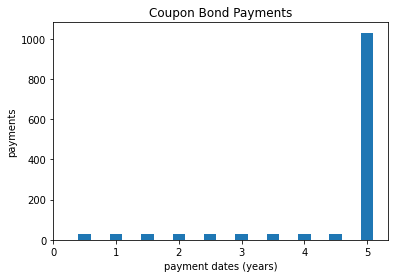

In [23]:
coupon_bond.plot_payments()

## 1: Try creating a bond object for a particular coupon bond.  For example, for a 3 year bond with a $10,000 face value paying a 7% coupon with semiannual payments


[0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
[350.00000000000006, 350.00000000000006, 350.00000000000006, 350.00000000000006, 350.00000000000006, 10350.0]


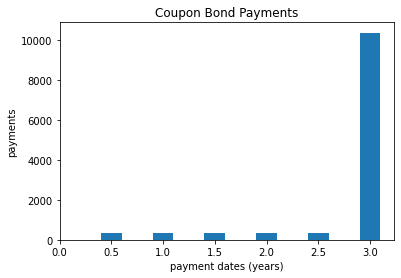

In [26]:
bond = fi.create_coupon_bond(maturity = 3, face = 10000, rate = 7, frequency = 2)
#check it
print(bond.get_dates())
print(bond.get_coupons())
bond.plot_payments()

## 2: The bond functionality in this module provides a laboratory for exploring the relationship between the prices and yields of bonds.  You can just create some coupon bonds and then compute the yield to maturity for different prices.  To get started, let's make a 10 year bond with a 9% coupon:


In [29]:
bond_1 = fi.create_coupon_bond(maturity = 10, face = 10000, rate = 9, frequency = 2)
#check it
print(bond.get_dates())
print(bond.get_coupons())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
[250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 10250.0]


In [32]:
bond_1.YTM(10000)

8.999999999999956

### Study relationship price - yield

In [0]:
prices = [ i for i in range(8000,13000,500)]
yields = [bond_1.YTM(price) for price in prices]

In [44]:
import pandas as pd
df = pd.DataFrame(columns=['price','yield'])
df['price']=prices
df['yield'] = yields
df.head()

,price,yield
0,8000,12.568248
1,8500,11.570079
2,9000,10.649325
3,9500,9.795483
4,10000,9.000000


Text(0.5, 1.0, 'relationship price - yield')

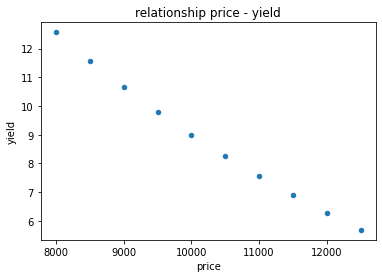

In [49]:
import matplotlib.pyplot as plt

df.plot.scatter(x='price',y='yield')
plt.title('relationship price - yield')

In [58]:
#DV01
# DV01 or Dollar Value of 1 basis point measures the interest rate risk of bond
#  or portfolio of bonds by estimating the price change in dollar terms in
#  response to change in yield by a single basis point
# https://www.wallstreetmojo.com/dv01/

#DV01 = -(delta yield)/[(delta price)*10000]
price_1 = 100
yield_1 = bond_1.YTM(price=price_1)
price_2 = 80
yield_2 = bond_1.YTM(price=price_2)

dv01 = -(yield_2-yield_1)/((price_2-price_1)*10000)
print('A movement of 1bps(0.01 pct) up in the yield will move down the price %.4f points'%dv01)
print('A movement of 1 figure(1 pct) up in the yield will move down the price %.4f points'%(dv01*1000))

A movement of 1bps(0.01 pct) up in the yield will move down the price 0.0011 points
A movement of 1 figure(1 pct) up in the yield will move down the price 1.1250 points
